# Dataset Exploration with Public Bike datasets
## by (Seunggyun Han)

## Preliminary Wrangling

> In this project, I will investigate [NYC CitiBike trip dataset](https://s3.amazonaws.com/tripdata/index.html) from June to August in 2020. This data set includes information about individual rides made in NYC.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_bike_june = pd.read_csv('data/202006-citibike-tripdata.csv')
df_bike_july = pd.read_csv('data/202007-citibike-tripdata.csv')
df_bike_august = pd.read_csv('data/202008-citibike-tripdata.csv')

In [3]:
df_bike_june.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1062,2020-06-01 00:00:03.3720,2020-06-01 00:17:46.2080,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2
1,3810,2020-06-01 00:00:03.5530,2020-06-01 01:03:33.9360,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0
2,1017,2020-06-01 00:00:09.6140,2020-06-01 00:17:06.8330,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2
3,226,2020-06-01 00:00:12.1780,2020-06-01 00:03:58.8640,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0
4,1437,2020-06-01 00:00:21.2550,2020-06-01 00:24:18.9650,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2


In [4]:
df_bike = pd.concat([df_bike_june,df_bike_july,df_bike_august], axis=0, ignore_index=True)

In [5]:
df_bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1062,2020-06-01 00:00:03.3720,2020-06-01 00:17:46.2080,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2
1,3810,2020-06-01 00:00:03.5530,2020-06-01 01:03:33.9360,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0
2,1017,2020-06-01 00:00:09.6140,2020-06-01 00:17:06.8330,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2
3,226,2020-06-01 00:00:12.1780,2020-06-01 00:03:58.8640,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0
4,1437,2020-06-01 00:00:21.2550,2020-06-01 00:24:18.9650,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2


In [6]:
df_bike.shape

(6317595, 15)

In [7]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317595 entries, 0 to 6317594
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
dtypes: float64(4), int64(6), object(5)
memory usage: 723.0+ MB


In [8]:
df_bike['starttime'] = pd.to_datetime(df_bike['starttime'])
df_bike['stoptime'] = pd.to_datetime(df_bike['stoptime'])

In [9]:
df_bike['starthour'] = df_bike['starttime'].dt.hour

In [10]:
df_bike['dayofweek'] = df_bike['starttime'].dt.dayofweek

In [11]:
df_bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,starthour,dayofweek
0,1062,2020-06-01 00:00:03.372,2020-06-01 00:17:46.208,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2,0,0
1,3810,2020-06-01 00:00:03.553,2020-06-01 01:03:33.936,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0,0,0
2,1017,2020-06-01 00:00:09.614,2020-06-01 00:17:06.833,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2,0,0
3,226,2020-06-01 00:00:12.178,2020-06-01 00:03:58.864,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0,0,0
4,1437,2020-06-01 00:00:21.255,2020-06-01 00:24:18.965,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2,0,0


In [12]:
df_bike.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'starthour', 'dayofweek'],
      dtype='object')

In [13]:
df_bike.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,starthour,dayofweek
count,6.317595e+06,6.317595e+06,6.317595e+06,6.317595e+06,6.317595e+06,6.317595e+06,6.317595e+06,6.317595e+06,6.317595e+06,6.317595e+06,6.317595e+06,6.317595e+06
mean,1.533578e+03,2.068623e+03,4.074024e+01,-7.397615e+01,2.061726e+03,4.073981e+01,-7.397632e+01,3.444090e+04,1.981646e+03,1.170752e+00,1.458771e+01,3.083131e+00
std,1.696677e+04,1.538120e+03,3.555435e-02,2.366845e-02,1.539283e+03,3.547555e-02,2.373837e-02,8.989142e+03,1.221377e+01,6.363356e-01,4.790379e+00,2.019306e+00
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,4.065540e+01,-7.407146e+01,1.452900e+04,1.873000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.930000e+02,4.260000e+02,4.071582e+01,-7.399384e+01,4.260000e+02,4.071560e+01,-7.399393e+01,2.858500e+04,1.969000e+03,1.000000e+00,1.100000e+01,1.000000e+00
50%,9.140000e+02,3.096000e+03,4.073932e+01,-7.398068e+01,3.093000e+03,4.073827e+01,-7.398086e+01,3.749100e+04,1.985000e+03,1.000000e+00,1.500000e+01,3.000000e+00
75%,1.577000e+03,3.491000e+03,4.076440e+01,-7.395901e+01,3.486000e+03,4.076371e+01,-7.395903e+01,4.173400e+04,1.991000e+03,2.000000e+00,1.800000e+01,5.000000e+00
max,3.522382e+06,4.124000e+03,4.085225e+01,-7.389795e+01,4.124000e+03,4.085225e+01,-7.389795e+01,4.684000e+04,2.004000e+03,2.000000e+00,2.300000e+01,6.000000e+00


### What is the structure of your dataset?

> The dataset includes 6,317,595 entries and 16 columns. Each row contains information about time (start time, end time, and duration), location (start and end stations), and personal information (birth year and gender) of riders.

### What is/are the main feature(s) of interest in your dataset?

> distribution of the trip durations, temporal distribution of the trips (time of day, and day of the week), spatial distribution of the trips (locations of start and end stations), and distribution in terms of gender of the riders and age of the riders.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> `tripduration`, `hour`, `dayofweek`, `start station latitude`, `start station longitude`, `end station latitude`, `end station longitude`, `birth year`, `gender`

## Univariate Exploration

### Trip duration

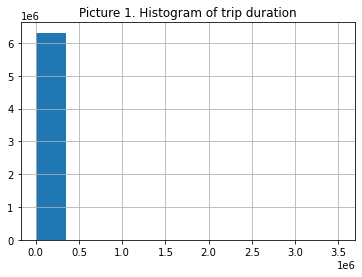

In [14]:
# plot a histogram
plt.title('Picture 1. Histogram of trip duration')
df_bike['tripduration'].hist()

In [15]:
df_bike['tripduration'].quantile(0.99)

6516.0

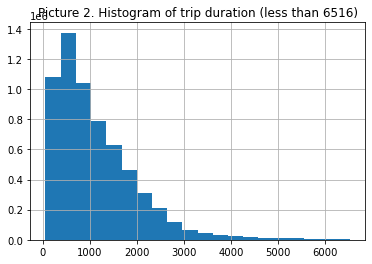

In [16]:
plt.title('Picture 2. Histogram of trip duration (less than 6516)')
df_bike.loc[df_bike['tripduration']<6517]['tripduration'].hist(bins=20)

In [17]:
log_data = np.log10(df_bike['tripduration'])
log_bin_edges = np.arange(0.5, log_data.max()+0.2, 0.1)

Text(0.5, 0, 'log(values)')

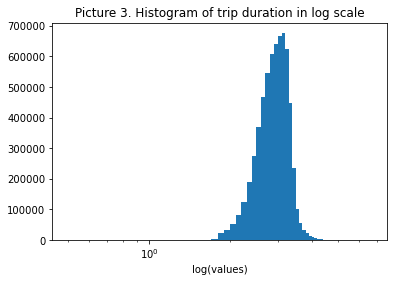

In [18]:
plt.title('Picture 3. Histogram of trip duration in log scale')
plt.xscale('log')
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(values)')

> **Summary**<br><br> 
When I tried to draw a histogram without any transformation or scaling, it was very hard to see any distribution in the histogram (Picture 1). Therefore I tried two different ways to get some insight. First, I truncated values that are more than 99% percentile (6516) of the trip durations (Picture 2). Second, I tried to draw a histogram with a log-scaled x-axis (Picture 3).  <br><br>
In Picture 2, the distribution of the trip durations looks left-skewed. Otherwise, the log-scaled histogram (Picture 3) looks more normally distributed. 

### Gender

In [19]:
# print the ratios of each gender to the entire dataset.
df_bike['gender'].value_counts() / df_bike['gender'].value_counts().sum()

1    0.565921
2    0.302416
0    0.131664
Name: gender, dtype: float64

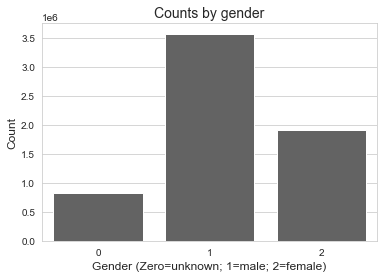

In [20]:
# plot the bar chart
sns.set_style('whitegrid')
sns.countplot(df_bike['gender'], color='#636363')
plt.title('Counts by gender', fontsize=14)
plt.xlabel('Gender (Zero=unknown; 1=male; 2=female)', fontsize=12);
plt.ylabel('Count', fontsize=12);

> **Summary**<br><br>
Compared with the others, trips by male riders make up the largest portion (56%). The number of trips by female riders (30%) is about half of the number of trips by male riders. The number of trips by 'unknown' category is around 13% of the number of the entire rows.

### User Type

In [21]:
# print the ratios of each usertype to the entire dataset.
df_bike['usertype'].value_counts() / df_bike['usertype'].value_counts().sum()

Subscriber    0.713813
Customer      0.286187
Name: usertype, dtype: float64

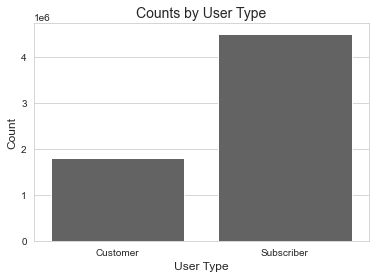

In [22]:
sns.set_style('whitegrid')
sns.countplot(df_bike['usertype'], color='#636363')
plt.title('Counts by User Type', fontsize=14)
plt.xlabel('User Type', fontsize=12);
plt.ylabel('Count', fontsize=12);

> The number of trips by subscribers is more than two times of the number of trips by the customer category.

### Hour

In [23]:
# print the ratios of each time to the entire dataset.
df_bike['starthour'].value_counts() / df_bike['starthour'].value_counts().sum()

17    0.095486
18    0.095446
19    0.079805
16    0.078933
15    0.071076
14    0.065373
13    0.061806
12    0.057900
20    0.056965
11    0.049491
10    0.043239
9     0.041936
8     0.041748
21    0.036603
7     0.029567
22    0.026604
23    0.019248
6     0.016687
0     0.011557
1     0.006906
5     0.005245
2     0.003994
3     0.002341
4     0.002043
Name: starthour, dtype: float64

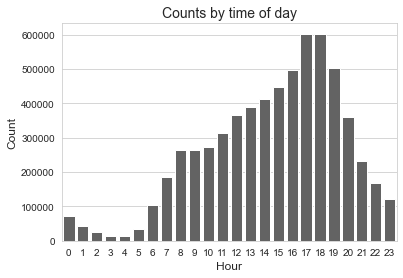

In [25]:
sns.set_style('whitegrid')
sns.countplot(df_bike['starthour'], color='#636363')
plt.title('Counts by time of day', fontsize=14)
plt.xlabel('Hour', fontsize=12);
plt.ylabel('Count', fontsize=12);

> **Summary**  
The number of trips is peaked at 5 and 6 p.m. Also, there are fewer trips at 3 or 4 a.m than the other times.

### Day of week

In [26]:
# print the ratios of each day of week to the entire dataset.
df_bike['dayofweek'].value_counts() / df_bike['dayofweek'].value_counts().sum()

5    0.161772
6    0.151250
0    0.139580
3    0.138345
1    0.136964
2    0.136792
4    0.135297
Name: dayofweek, dtype: float64

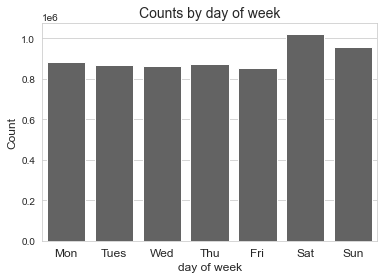

In [27]:
sns.set_style('whitegrid')
sns.countplot(df_bike['dayofweek'], color='#636363')
plt.title('Counts by day of week', fontsize=14)
plt.xlabel('day of week', fontsize=12);
plt.ylabel('Count', fontsize=12);
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Mon','Tues','Wed','Thu','Fri','Sat','Sun'],fontsize='12');

> **Summary** <br><br>The numbers of the trips in weekdays are less than weekends.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

---

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### trip duration & gender

In [28]:
df_bike_male = df_bike.loc[df_bike['gender']==1]
df_bike_female = df_bike.loc[df_bike['gender']==2]

In [29]:
log_bin_edges = np.arange(0.5, log_data.max()+0.2, 0.1)

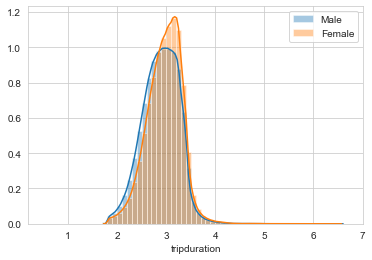

In [30]:
sns.distplot(np.log10(df_bike_male['tripduration']), bins=log_bin_edges, label='Male')
sns.distplot(np.log10(df_bike_female['tripduration']),bins = log_bin_edges, label='Female')
plt.legend()

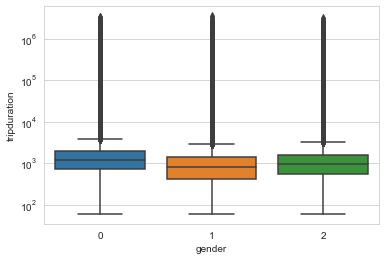

In [48]:
sns.boxplot(x='gender', y='tripduration', data=df_bike)
plt.yscale('log')

### Trip duration & User Type

In [32]:
df_bike_subscriber = df_bike.loc[df_bike['usertype']=='Subscriber']
df_bike_customer = df_bike.loc[df_bike['usertype']=='Customer']

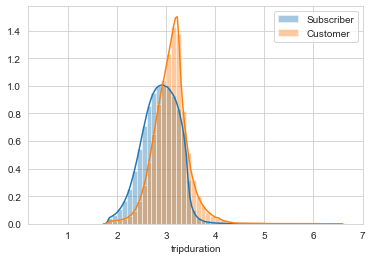

In [33]:
sns.distplot(np.log10(df_bike_subscriber['tripduration']), bins=log_bin_edges, label='Subscriber')
sns.distplot(np.log10(df_bike_customer['tripduration']),bins = log_bin_edges, label='Customer')
plt.legend()

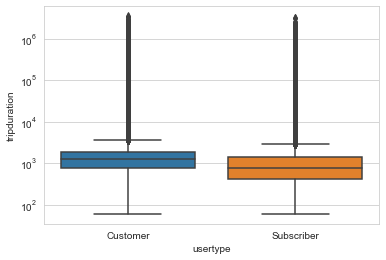

In [57]:
sns.boxplot(x='usertype', y='tripduration', data=df_bike)
plt.yscale('log')

### Trip duration & time of day

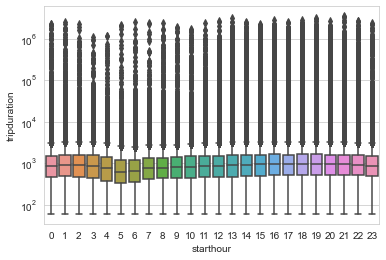

In [63]:
sns.boxplot(x='starthour', y='tripduration', data=df_bike)
plt.yscale('log')

### Trip duration & day of week

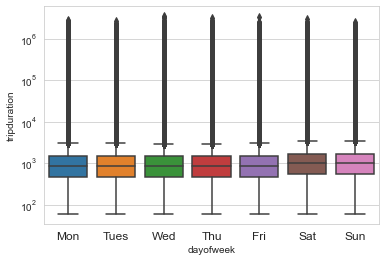

In [89]:
sns.boxplot(x='dayofweek', y='tripduration', data=df_bike)
plt.yscale('log')
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Mon','Tues','Wed','Thu','Fri','Sat','Sun'],fontsize='12');

### Gender & User Type

In [78]:
df_bike_count = df_bike.groupby(['usertype',
                                 'gender'],
                                 as_index=False).count()[['usertype',
                                                          'gender',
                                                          'tripduration']].rename(columns={'tripduration':'count'})

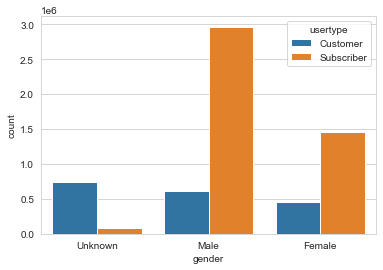

In [82]:
sns.barplot(data=df_bike_count, x='gender', y='count', hue='usertype');
plt.xticks(ticks=[0,1,2], labels=['Unknown','Male','Female']);

### dayofweek & Gender

In [83]:
df_bike_count = df_bike.groupby(['dayofweek',
                                 'gender'],
                                 as_index=False).count()[['dayofweek',
                                                          'gender',
                                                          'tripduration']].rename(columns={'tripduration':'count'})

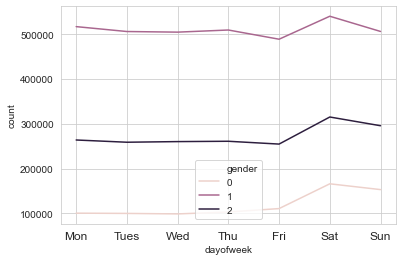

In [90]:
sns.lineplot(data=df_bike_count, x='dayofweek', y='count', hue='gender');
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Mon','Tues','Wed','Thu','Fri','Sat','Sun'],fontsize='12');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!